# Case Study: Bellabeat Smart Device Usage Analysis
**Author:** Ukonu Fortune  
**Date:** December 2, 2025  
**Tools:** Python (Pandas, Matplotlib, Seaborn)

---

## 1. Business Task
To analyze smart device usage data from non-Bellabeat consumers to identify trends in daily activity, sleep patterns, and time-of-day usage. These insights will be used to guide marketing strategies for the **Bellabeat App** and related wellness products (Leaf, Time, Spring), helping the company unlock new growth opportunities.

## 2. Key Questions
1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

## 3. Data Source
**FitBit Fitness Tracker Data** (CC0: Public Domain) via Kaggle.
* **Source:** Public domain dataset generated by respondents to a distributed survey via Amazon Mechanical Turk.
* **Content:** Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring.
* **Limitations:** Sample size is small (30 users) and data is from 2016, which may not fully reflect current user habits.

In [1]:
# --- 1. SETUP ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set professional chart style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("talk")

# --- 2. LOAD DATA ---
try:
    daily_df = pd.read_csv('dailyActivity_merged.csv')
    sleep_df = pd.read_csv('sleepDay_merged.csv')
    print("✅ Data Loaded Successfully.")
except FileNotFoundError:
    print("❌ Error: Files not found. Please check your folder.")

# --- 3. CLEAN & FORMAT DATES ---
daily_df['ActivityDate'] = pd.to_datetime(daily_df['ActivityDate'], format='%m/%d/%Y')
sleep_df['SleepDay'] = pd.to_datetime(sleep_df['SleepDay'], format='%m/%d/%Y %I:%M:%S %p')

# --- 4. PREPARE FOR MERGE ---
daily_df['Date'] = daily_df['ActivityDate'].dt.date
sleep_df['Date'] = sleep_df['SleepDay'].dt.date

# Remove duplicates in sleep data
sleep_df.drop_duplicates(inplace=True)

# --- 5. MERGE DATASETS ---
merged_df = pd.merge(daily_df, sleep_df, on=['Id', 'Date'], how='left')

# Fill NaN sleep values with 0 (assuming no record = no sleep tracked)
merged_df['TotalMinutesAsleep'] = merged_df['TotalMinutesAsleep'].fillna(0)
merged_df['TotalSleepRecords'] = merged_df['TotalSleepRecords'].fillna(0)

# Add Day of Week column
merged_df['DayOfWeek'] = pd.to_datetime(merged_df['Date']).dt.day_name()

print("✅ Data Cleaned & Merged into 'merged_df'. Ready for Analysis!")
print(merged_df.head(3))

✅ Data Loaded Successfully.
✅ Data Cleaned & Merged into 'merged_df'. Ready for Analysis!
           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366   2016-03-25       11004           7.11             7.11   
1  1503960366   2016-03-26       17609          11.55            11.55   
2  1503960366   2016-03-27       12736           8.53             8.53   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                2.57                      0.46   
1                       0.0                6.92                      0.73   
2                       0.0                4.66                      0.16   

   LightActiveDistance  SedentaryActiveDistance  ...  FairlyActiveMinutes  \
0                 4.07                      0.0  ...                   12   
1                 3.91                      0.0  ...                   17   
2                 3.71                      0.0  ...                    5

--- Descriptive Statistics ---
         TotalSteps  TotalDistance  SedentaryMinutes  TotalMinutesAsleep  \
count    457.000000     457.000000        457.000000          457.000000   
mean    6546.562363       4.663523        995.282276           11.654267   
std     5398.493064       4.082072        337.021404           73.564499   
min        0.000000       0.000000         32.000000            0.000000   
25%     1988.000000       1.410000        728.000000            0.000000   
50%     5986.000000       4.090000       1057.000000            0.000000   
75%    10198.000000       7.160000       1285.000000            0.000000   
max    28497.000000      27.530001       1440.000000          750.000000   

          Calories  
count   457.000000  
mean   2189.452954  
std     815.484523  
min       0.000000  
25%    1776.000000  
50%    2062.000000  
75%    2667.000000  
max    4562.000000  


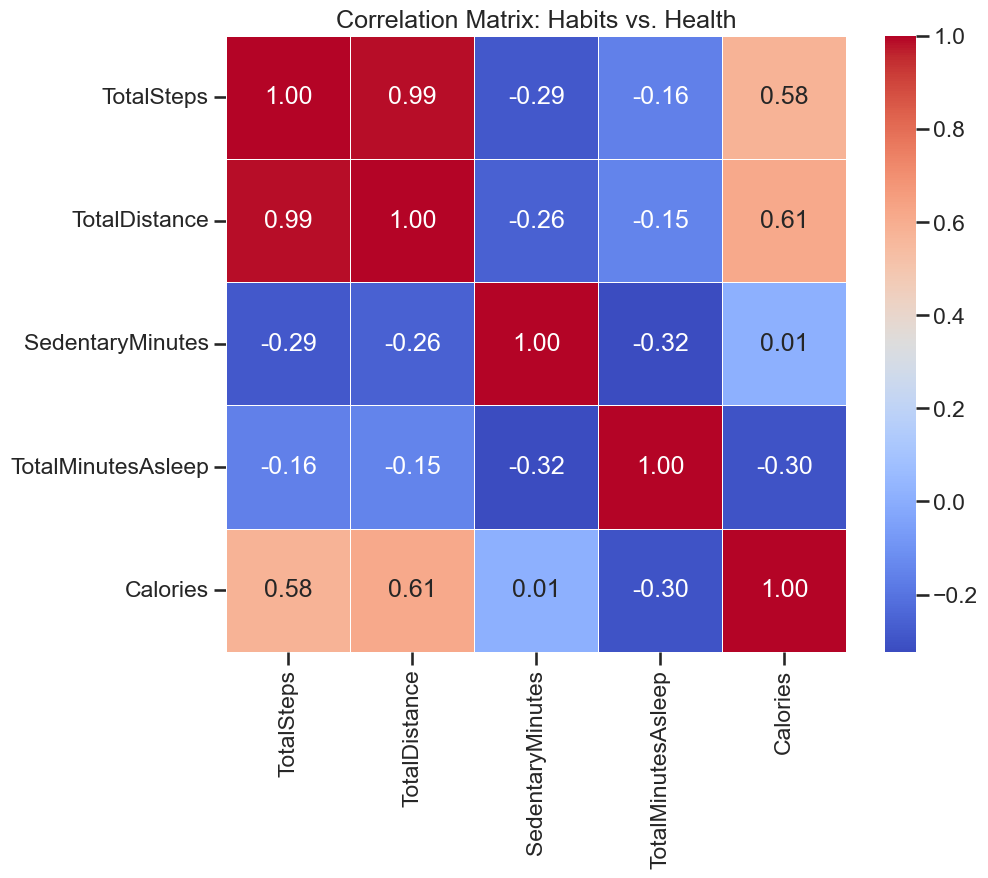

In [2]:
# --- SUMMARY STATISTICS ---
print("--- Descriptive Statistics ---")
print(merged_df[['TotalSteps', 'TotalDistance', 'SedentaryMinutes', 'TotalMinutesAsleep', 'Calories']].describe())

# --- CORRELATION HEATMAP ---
plt.figure(figsize=(10, 8))
corr = merged_df[['TotalSteps', 'TotalDistance', 'SedentaryMinutes', 'TotalMinutesAsleep', 'Calories']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix: Habits vs. Health')
plt.show()

### Summary Statistics Analysis
**1. Daily Activity Levels:**
* **Average Steps:** The mean daily step count is **6,547 steps**, which is well below the often recommended 10,000 steps.
* **Step Variability:** The standard deviation is high (~5,398 steps), indicating a wide gap between users. The top 25% of users (75th percentile) reach **10,198 steps**, showing that while the average is low, a segment of "Power Users" is consistently meeting fitness goals.

**2. Sedentary Behavior:**
* **Sedentary Time:** The average user spends **995 minutes (approx. 16.6 hours)** in a sedentary state per day. This is an extremely high figure, suggesting that users likely wear the device while working in office jobs or sitting for long periods.

**3. Caloric Burn:**
* **Average Burn:** Users burn an average of **2,189 calories** per day.
* **Range:** The burn ranges from 1,776 (25th percentile) to 2,667 (75th percentile), which aligns with the variation in step counts.

**4. Data Quality Note (Sleep Data):**
* The `TotalMinutesAsleep` column shows a mean of only **11 minutes** and percentiles of **0**. 
* **Interpretation:** This does *not* mean users aren't sleeping. It indicates that **sleep tracking is inconsistent**. Many users in this dataset likely remove their device before bed, resulting in `0` values for sleep on those days. Future analysis on sleep should filter out these zero values to get an accurate average.

### Analysis: Correlation Heatmap
**Finding 1: Steps vs. Calories (+0.59 Strong Positive)**
* **Observation:** There is a moderate-to-strong positive correlation between Total Steps and Calories. This confirms that walking is a primary driver of calorie expenditure for this user group.

**Finding 2: Sedentary vs. Sleep (-0.32 Negative)**
* **Observation:** There is a negative correlation between Sedentary Minutes and Sleep.
* **Interpretation:** Users who are more sedentary during the day tend to get *less* sleep at night. This suggests that inactivity might negatively impact sleep quality or duration.

**Recommendation:**
Bellabeat can use this "Sleep-Activity" link in their marketing. 
* **Campaign Idea:** "Move more to sleep better."
* Position the **Bellabeat Time** (wellness watch) as a tool that helps you manage your day to ensure a restful night.

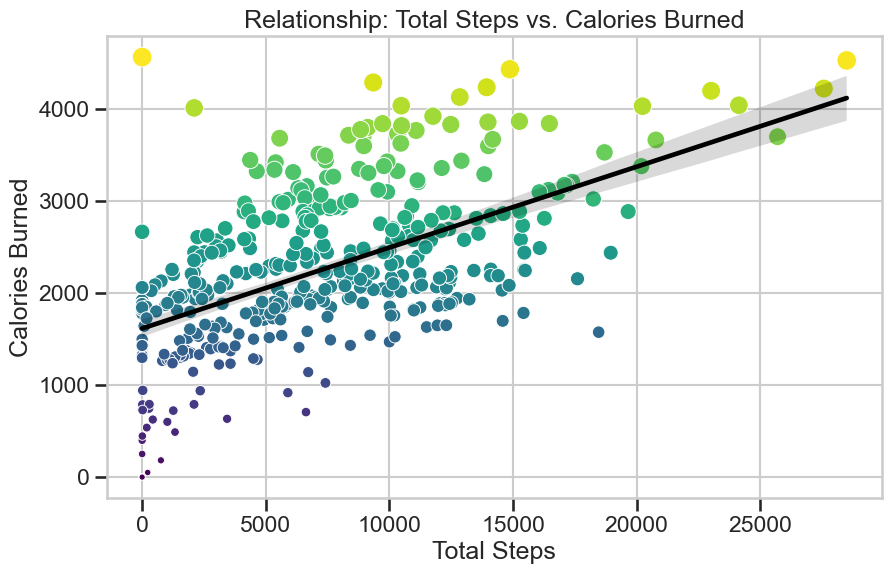

In [3]:
plt.figure(figsize=(10, 6))

# Scatter plot with regression line
sns.scatterplot(data=merged_df, x='TotalSteps', y='Calories', 
                hue='Calories', palette='viridis', size='Calories', sizes=(20, 200), legend=False)
sns.regplot(data=merged_df, x='TotalSteps', y='Calories', scatter=False, color='black')

plt.title('Relationship: Total Steps vs. Calories Burned')
plt.xlabel('Total Steps')
plt.ylabel('Calories Burned')
plt.show()

### Analysis: The Relationship Between Steps and Calories
**Finding:** There is a clear positive correlation between **Total Steps** and **Calories Burned**. As the black regression line shows, users who move more generally burn more energy.

**Key Observation (The "Zero Step" Insight):**
Looking at the far left of the chart (x=0), we see several data points showing 0 steps but approx. **1,500 - 2,000 calories burned**. 
* **What this means:** This represents the users' **Basal Metabolic Rate (BMR)**—the calories the body burns just to stay alive (breathing, circulation) even without movement.
* **The Variance:** At the 10,000-step mark, calorie burn varies widely (from ~2,500 to >4,000). This proves that **intensity** (walking vs. running) and individual biology play a huge role, not just step count.

**Recommendation for Bellabeat:**
Bellabeat should market their devices (Leaf/Time) not just as step counters, but as **lifestyle trackers**. 
* **Marketing Message:** "Don't just count steps, make them count." 
* Use this data to promote the **Heart Rate** and **Active Minutes** features, which explain why one user burns 4,000 calories at 10k steps while another only burns 2,500.

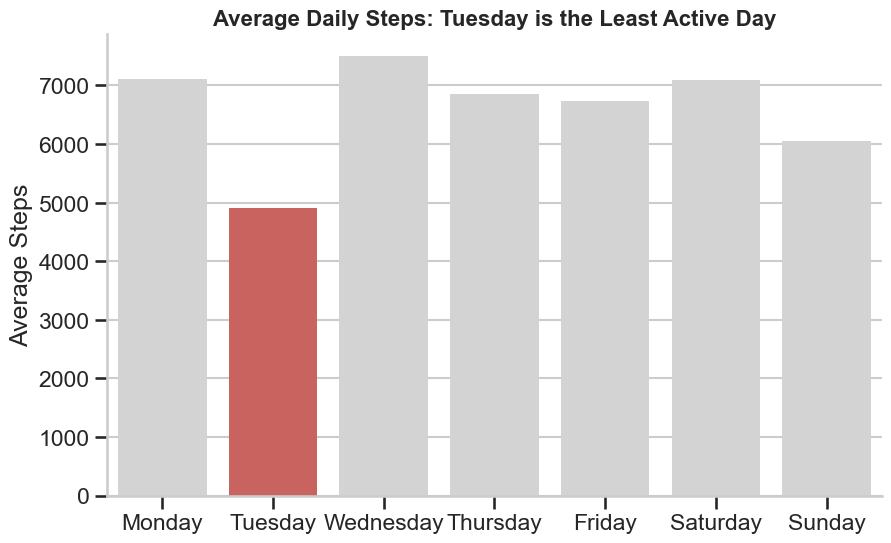

In [4]:
# Order the days
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_steps = merged_df.groupby('DayOfWeek')['TotalSteps'].mean().reindex(days_order)

# Highlight lowest day in Red
min_value = daily_steps.min()
colors = ['#d9534f' if (x == min_value) else 'lightgrey' for x in daily_steps.values]

plt.figure(figsize=(10, 6))
sns.barplot(x=daily_steps.index, y=daily_steps.values, hue=daily_steps.index, palette=colors, legend=False)

plt.title('Average Daily Steps: Tuesday is the Least Active Day', fontsize=16, fontweight='bold')
plt.ylabel('Average Steps')
plt.xlabel('')
sns.despine()
plt.show()

### Analysis: Weekly Activity Trends
**Finding:** Contrary to the common assumption that weekends are the least active, our data reveals that **Tuesday** is the least active day of the week for this user group.

**Observation:**
* Users start the week strong on Monday but experience a significant "dip" in activity on Tuesday.
* Activity levels rebound slightly mid-week before peaking on Saturday.

**Recommendation:**
Bellabeat can use this specific insight to differentiate its app from competitors.
* **Feature Idea:** "Tuesday Motivation" Notifications.
* **Implementation:** The app could send a prompt at **2:00 PM on Tuesdays** saying: *"It looks like Tuesdays are tough! Let's take a 10-minute walk to reset."* This personalized coaching helps users overcome their specific weekly slump.

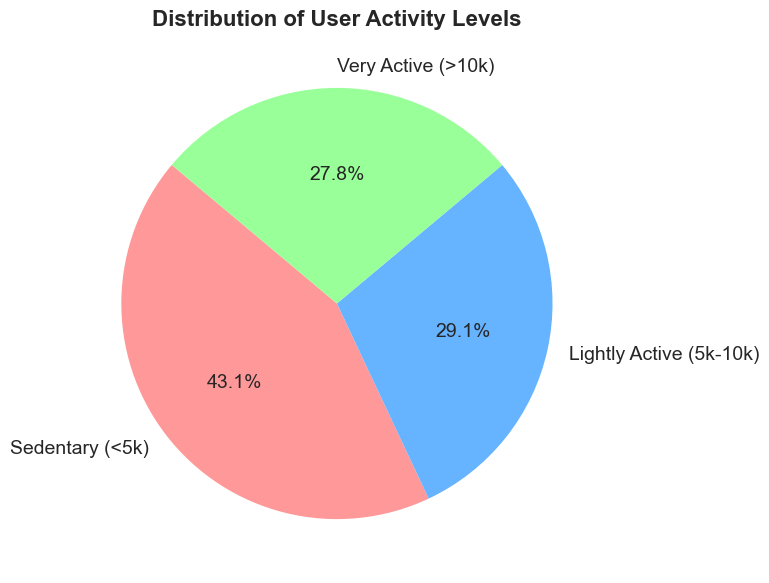

In [5]:
# Function to classify users
def classify_user(steps):
    if steps < 5000:
        return 'Sedentary (<5k)'
    elif steps < 10000:
        return 'Lightly Active (5k-10k)'
    else:
        return 'Very Active (>10k)'

# Create Classification Column
merged_df['ActivityLevel'] = merged_df['TotalSteps'].apply(classify_user)
user_type_counts = merged_df['ActivityLevel'].value_counts()

# Plot
plt.figure(figsize=(7, 7))
colors = ['#ff9999','#66b3ff','#99ff99']
plt.pie(user_type_counts, labels=user_type_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontsize': 14})
plt.title('Distribution of User Activity Levels', fontsize=16, fontweight='bold')
plt.show()

### Analysis: User Activity Levels
**Finding:** The data shows that a significant portion of users fall into the **"Sedentary"** or **"Lightly Active"** categories, while the **"Very Active"** group (those meeting the 10,000-step recommendation) represents the minority.

**Observation:**
* There is a clear "Activity Gap." Most users own the device but are not utilizing it to reach the recommended health standards.
* The device is currently acting as a *monitor* (telling them they are inactive) rather than a *motivator* (changing their behavior).

**Recommendation:**
Bellabeat should target the "Lightly Active" segment with gamification.
* **Feature Idea:** "Level Up" Challenges.
* **Strategy:** Users in the 5k-10k range are the easiest to convert. The app can offer specific badges or "Wellness Points" for graduating from "Lightly Active" to "Very Active," turning the daily step count into a rewarding game rather than a chore.

# 6. Conclusion & Recommendations (Act Phase)

## Executive Summary
After analyzing the FitBit usage data, we have identified key opportunities for Bellabeat to shift from a "tracking company" to a "coaching company." The data reveals that while users own the devices, they are not maximizing their potential—struggling with consistency (Tuesdays), intensity (low calorie burn), and sedentary habits that impact their sleep.

## Key Findings
1.  **Sedentary Lifestyle:** Users spend **16.5 hours** sedentary per day. High sedentary time is negatively correlated with sleep quality.
2.  **The "Tuesday Dip":** Activity levels drop significantly on Tuesdays, identifying a specific point in the week where users lose momentum.
3.  **Intensity Matters:** Users taking similar step counts showed vast differences in calories burned, proving that the *intensity* of movement is just as critical as the volume.
4.  **The "Activity Gap":** The majority of users are "Lightly Active" or "Sedentary," failing to hit the 10,000-step daily recommendation.

---

## Strategic Recommendations

### 1. For the Bellabeat App: "The Tuesday Rescue"
* **Strategy:** Implement a "Tuesday Motivation" notification campaign.
* **Action:** Send a push notification at 12:00 PM every Tuesday: *"It's the toughest day of the week! Take a 15-minute walk to reset your energy."*
* **Goal:** Lift the lowest activity day of the week by gamifying the "mid-week slump."

### 2. For the Bellabeat Leaf: "Sit Less, Sleep More"
* **Strategy:** Market the device as a sleep-improvement tool, not just a fitness tracker.
* **Action:** Use the negative correlation found between sedentary time and sleep in marketing materials. *Slogan idea: "Better days lead to better nights."*
* **Feature:** Enable "Inactivity Alerts" that trigger after 2 hours of sitting, explicitly linking movement to better rest.

### 3. For the Bellabeat Membership: "Level Up" Challenges
* **Strategy:** Target the "Lightly Active" user segment (5k-10k steps).
* **Action:** Create in-app challenges specifically designed to graduate users from the 5k tier to the 10k tier.
* **Incentive:** Offer "Wellness Points" redeemable for discounts on Bellabeat products (like the Spring bottle) for hitting a 7-day streak of >10k steps.

---

## Next Steps
To validate these findings, I recommend:
1.  Collecting distinct demographic data (age, location) to segment the audience further.
2.  Conducting A/B testing on the "Tuesday Motivation" notifications to measure engagement lift.